In [270]:
import numpy as np
import random

In [271]:
class unvaccinatedPerson(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 20
        self.interaction = []
        
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate
        
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
        
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
        
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):   
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
                
    def update_days_sick(self):
        if (self.status == "Infected"): 
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
            
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_rate)
        if (is_sick):
            self.infect(4)
            
class vaccinatedPerson (object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_vrate = 5
        self.interaction = []
        
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate
        
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
        
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
        
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):   
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
                
    def update_days_sick(self):
        if (self.status == "Infected"): 
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
            
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_vrate)
        if (is_sick):
            self.infect(4)
    

In [272]:
n = 100
unvaccinated_population = []

for i in range(1, n + 1):
    generic_dude = unvaccinatedPerson()
    unvaccinated_population.append(generic_dude)
    
for j in range(1, n + 1):
    unvaccinated_persons_interacted = []
    for x in range(0, 10): 
        some_unvaccinated_person = random.randint(1, n)
        unvaccinated_persons_interacted.append(some_unvaccinated_person)
        if (some_unvaccinated_person == j):
            some_unvaccinated_person = random.randint(1, 100)
    #print("Person " + str(j) + " interacted with Persons: " + str(persons_interacted))

In [273]:
n = 100
vaccinated_population = []

for i in range(1, n + 1):
    generic_dude = vaccinatedPerson()
    vaccinated_population.append(generic_dude)
    
for j in range(1, n + 1):
    vaccinated_persons_interacted = []
    for x in range(0, 10): 
        some_vaccinated_person = random.randint(1, n)
        vaccinated_persons_interacted.append(some_vaccinated_person)
        if (some_vaccinated_person == j):
            some_vaccinated_person = random.randint(1, 100)
    #print("Person " + str(j) + " interacted with Persons: " + str(persons_interacted))

In [274]:
#interactions = []
#index = -1
#for p in population:
#    p_interactions = []
#    for i in range(0,10):
#        r = random.randint(0,100)
#        p_interactions.append(r)
#    interactions.append(p_interactions)

#for i in interactions:
#    index = index + 1
#    print ("Person:", index, " interacted with:", i)

In [275]:
# We're selecting 10 indexes of people we're going to infect
currently_infected = random.sample(range(100), 10)

for i in currently_infected:
    unvaccinated_population[i].infect(5)


print ("Day 1, number of people sick:" + str(len(currently_infected)))
print (currently_infected)

interactions = []
unvaccinated_person_index = -1
for p in unvaccinated_population:
    unvaccinated_person_index = unvaccinated_person_index + 1

    # if person_index is in the currently_sick list, everyone they interact w/ can get sick
    
    p_interactions = []
    for i in range(0,10):        
        r = random.randint(0,99)
        p_interactions.append(r)

        #If person_index is already sick, everyone they contact, might also get sick
        
        if (unvaccinated_person_index in currently_infected):
            unvaccinated_population[r].update()
            if (unvaccinated_population[r].status == "Infected" and r not in currently_infected):
                currently_infected.append(r)
        #If anyone has an infected person in their interactions list, *they* might get infected
        if (r in currently_infected):
            unvaccinated_population[unvaccinated_person_index].update()
            if (unvaccinated_population[unvaccinated_person_index].status == "Infected" and unvaccinated_person_index not in currently_infected):
                currently_infected.append(unvaccinated_person_index)
    interactions.append(p_interactions)
        
        
# person_index = -1
# for i in interactions:
#     person_index = person_index + 1
#     print ("Person:", person_index, " interacted with:", i)

print ("End of Day 1, number of unvaccinated people sick:", len(currently_infected))
print (currently_infected)

Day 1, number of people sick:10
[36, 40, 64, 47, 15, 43, 83, 46, 30, 87]
End of Day 1, number of unvaccinated people sick: 75
[36, 40, 64, 47, 15, 43, 83, 46, 30, 87, 50, 61, 55, 32, 80, 27, 93, 97, 16, 69, 12, 91, 1, 99, 45, 51, 70, 68, 85, 49, 3, 29, 52, 53, 56, 98, 57, 39, 58, 31, 23, 59, 60, 62, 77, 65, 33, 66, 71, 73, 74, 7, 76, 75, 20, 92, 78, 14, 79, 81, 34, 18, 82, 10, 84, 21, 86, 89, 88, 5, 90, 63, 95, 96, 17]


In [276]:
# We're selecting 10 indexes of people we're going to infect
currently_infected = random.sample(range(100), 10)

for i in currently_infected:
    vaccinated_population[i].infect(5)


print ("Day 1, number of people sick:" + str(len(currently_infected)))
print (currently_infected)

interactions = []
vaccinated_person_index = -1
for p in vaccinated_population:
    vaccinated_person_index = vaccinated_person_index + 1

    # if person_index is in the currently_sick list, everyone they interact w/ can get sick
    
    p_interactions = []
    for i in range(0,10):        
        r = random.randint(0,99)
        p_interactions.append(r)

        #If person_index is already sick, everyone they contact, might also get sick
        
        if (vaccinated_person_index in currently_infected):
            vaccinated_population[r].update()
            if (vaccinated_population[r].status == "Infected" and r not in currently_infected):
                currently_infected.append(r)
        #If anyone has an infected person in their interactions list, *they* might get infected
        if (r in currently_infected):
            vaccinated_population[vaccinated_person_index].update()
            if (vaccinated_population[vaccinated_person_index].status == "Infected" and vaccinated_person_index not in currently_infected):
                currently_infected.append(vaccinated_person_index)
    interactions.append(p_interactions)
        
        
# person_index = -1
# for i in interactions:
#     person_index = person_index + 1
#     print ("Person:", person_index, " interacted with:", i)

print ("End of Day 1, number of vaccinated people sick:", len(currently_infected))
print (currently_infected)

Day 1, number of people sick:10
[88, 67, 77, 32, 39, 56, 49, 71, 44, 90]
End of Day 1, number of vaccinated people sick: 24
[88, 67, 77, 32, 39, 56, 49, 71, 44, 90, 1, 7, 46, 37, 63, 50, 54, 22, 3, 58, 10, 82, 85, 95]


In [277]:
class unvacPopulation:
    def __init__(self, number=10000, interaction=10): #vaccine=?
        self.unvaccinatedPeople = []
        self.number = number
        self.interaction = interaction
        
        if (number < 10000):
            self.number = 10000
            
        if (interaction < 10):
            self.interact = 10
            
        #build our population
        patient_Zero = unvaccinatedPerson()
        patient_Zero.infect(5)
        
        self.unvaccinatedPeople.append(patient_Zero)
        
        for i in range(0, number):
            p = unvaccinatedPerson()
            
            #pre vaccinate people here
            self.unvaccinatedPeople.append(p)
            
    def unvac_number_of_sick(self):
        sick_Count = 0
        for j in self.unvaccinatedPeople:
            if (j.status == "Infected"):
                sick_Count = sick_Count + 1
                
        return sick_Count
        
    def unvac_number_of_recovered(self):
        recovered_Count = 0
        for j in self.unvaccinatedPeople:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
                
        return recovered_Count
    
    def unvac_number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.unvaccinatedPeople:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    # Here's the brains of the population class (and our code)
    # the update will be ran everyday (meaning, every iteration of our while loop)
    # build interaction tables (who interacted with who)
    # if person interacts with sick, then they must roll die
    # if I interacted with 10 people and I'm sick, then each of them must roll 

    def update(self):
        # people who might get sick
        unvac_might_Get_Sick = []
        
        for unvaccinated_person in self.unvaccinatedPeople:
            
            #clear out your interactions per day
            unvaccinated_person.interaction = []
            
            #These are the n number of people that you interact with
            
            for i in range(0, self.interaction):
                r = random.randint(0,self.number)
                unvaccinated_person.interaction.append(r)
                
            #if "person" is infected, every single person they interacted with might get sick
            if (unvaccinated_person.status == "Infected"):
                unvaccinated_person.update_days_sick()
                for m in unvaccinated_person.interaction:
                    if (self.unvaccinatedPeople[m].status ==  "Susceptible"):  #only susceptible people can get sicky susceptible people can get sickus == "Susceptible"): #only susceptible people can get sick
                        unvac_might_Get_Sick.append(self.unvaccinatedPeople[m]) #this list will keep growing with every person that needs to roll their die
                
            #if "person" is susceptible and they interact w/ someone who is "infected" 
            #person gets added to the "might get sick"
            if (unvaccinated_person.status == "Susceptible"):
                for m in unvaccinated_person.interaction:
                    if (self.unvaccniatedPeople[m].status == "Infected"):
                        unvac_might_Get_Sick.append(person)
                        
                        
        #Now! We're going to roll through our "Might Get Sick" and they each roll a die
        #this is only a list of susceptible people
        for m in unvac_might_Get_Sick:
            m.roll_for_infection()

In [278]:
class vacPopulation:
    def __init__(self, number=10000, interaction=10): #vaccine=?
        self.vaccinatedPeople = []
        self.number = number
        self.interaction = interaction
        
        if (number < 10000):
            self.number = 10000
            
        if (interaction < 10):
            self.interact = 10
            
        #build our population
        patient_Zero = vaccinatedPerson()
        patient_Zero.infect(5)
        
        self.vaccinatedPeople.append(patient_Zero)
        
        for i in range(0, number):
            p = vaccinatedPerson()
            
            #pre vaccinate people here
            self.vaccinatedPeople.append(p)
            
    def vac_number_of_sick(self):
        sick_Count = 0
        for j in self.vaccinatedPeople:
            if (j.status == "Infected"):
                sick_Count = sick_Count + 1
                
        return sick_Count
        
    def vac_number_of_recovered(self):
        recovered_Count = 0
        for j in self.vaccinatedPeople:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
                
        return recovered_Count
    
    def vac_number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.vaccinatedPeople:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    # Here's the brains of the population class (and our code)
    # the update will be ran everyday (meaning, every iteration of our while loop)
    # build interaction tables (who interacted with who)
    # if person interacts with sick, then they must roll die
    # if I interacted with 10 people and I'm sick, then each of them must roll 

    def update(self):
        # people who might get sick
        vac_might_Get_Sick = []
        
        for person in self.vaccinatedPeople:
            
            #clear out your interactions per day
            person.interaction = []
            
            #These are the n number of people that you interact with
            
            for i in range(0, self.interaction):
                r = random.randint(0,self.number)
                person.interaction.append(r)
                
            #if "person" is infected, every single person they interacted with might get sick
            if (person.status == "Infected"):
                person.update_days_sick()
                for m in person.interaction:
                    if (self.vaccinatedPeople[m].status ==  "Susceptible"):  #only susceptible people can get sicky susceptible people can get sickus == "Susceptible"): #only susceptible people can get sick
                        vac_might_Get_Sick.append(self.vaccinatedPeople[m]) #this list will keep growing with every person that needs to roll their die
                
            #if "person" is susceptible and they interact w/ someone who is "infected" 
            #person gets added to the "might get sick"
            if (person.status == "Susceptible"):
                for m in person.interaction:
                    if (self.vaccniatedPeople[m].status == "Infected"):
                        vac_might_Get_Sick.append(person)
                        
                        
        #Now! We're going to roll through our "Might Get Sick" and they each roll a die
        #this is only a list of susceptible people
        for m in vac_might_Get_Sick:
            m.roll_for_infection()

In [279]:
myCommunity = unvacPopulation(1000, 10)
day = 0
my_plot = [] 
unvac_number_sick = myCommunity.unvac_number_of_sick()

while (number_sick > 0):
    unvac_number_sick = myCommunity.unvac_number_of_sick()
    unvac_number_recovered = myCommunity.unvac_number_of_recovered()
    my_plot.append([day, unvac_number_sick, unvac_number_recovered])
    print ("day:", day, "Number of sick:", unvac_number_sick)
    
    day = day + 1
    myCommunity.update()
    
#print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Unvaccinated number recovered:", myCommunity.unvac_number_of_recovered())
print ("Unvaccinated number susceptible:", myCommunity.unvac_number_of_susceptible())

print (my_plot)

Unvaccinated number recovered: 0
Unvaccinated number susceptible: 1000
[]


In [280]:
myCommunity = vacPopulation(1000, 10)
day = 0
my_plot = [] 
vac_number_sick = myCommunity.vac_number_of_sick()

while (number_sick > 0):
    vac_number_sick = myCommunity.vac_number_of_sick()
    vac_number_recovered = myCommunity.vac_number_of_recovered()
    my_plot.append([day, vac_number_sick, vac_number_recovered])
    print ("day:", day, "Number of sick:", vac_number_sick)
    
    day = day + 1
    myCommunity.update()
    
#print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Vaccinated number recovered:", myCommunity.vac_number_of_recovered())
print ("Vaccinated number susceptible:", myCommunity.vac_number_of_susceptible())

print (my_plot)

Vaccinated number recovered: 0
Vaccinated number susceptible: 1000
[]


In [267]:
import pandas as pd
import matplotlib.pyplot as plt

In [268]:
df = pd.DataFrame(my_plot, columns=['day','unvac_number_sick', 'unvac_number_recovered'])

TypeError: no numeric data to plot

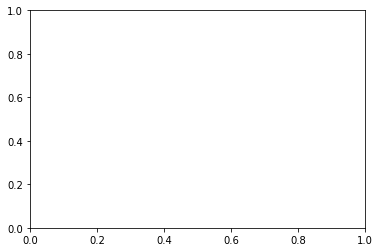

In [269]:
fig = plt.figure()
ax1 = plt.gca()
fig1 = df.plot(kind='line', x='day', y='unvac_number_recovered', ax=ax1).get_figure()
fig2 = df.plot(kind='line', x='day', y='unvac_number_sick', ax=ax1).get_figure()
plt.savefig('test.png')
plt.show()

In [140]:
df = pd.DataFrame(my_plot, columns=['day','vac_number_sick', 'vac_number_recovered'])

In [ ]:
fig = plt.figure()
ax1 = plt.gca()
fig1 = df.plot(kind='line', x='day', y='vac_number_recovered', ax=ax1).get_figure()
fig2 = df.plot(kind='line', x='day', y='vac_number_sick', ax=ax1).get_figure()
plt.savefig('test.png')
plt.show()